### Monthly provisional counts of deaths by age group and HHS region for select causes of death

In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from pprint import pprint

In [2]:
file= pd.read_csv("death_by_disease.csv")

In [3]:
death_cause= pd.DataFrame(file)
death_cause

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suppressed (counts 1-9),NaN,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,Suppressed (counts 1-9),NaN,NaN,NaN,NaN,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
death_updated=death_cause.drop(columns=['flag_allcause','flag_natcause','flag_sept','flag_neopl',
                                        'flag_diab','flag_alz','flag_inflpn','flag_clrd','flag_otherresp',
                                        'flag_nephr','flag_otherunk','flag_hd','flag_stroke','flag_cov19mcod',
                                        'flag_cov19ucod'])
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [5]:
death_updated[death_updated["Note"].str.contains("Data are provisional, and values in the most recent months are incomplete.")==False]
death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate,Note
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,NaN,0.0,...,NaN,27.0,NaN,217.0,34.0,NaN,0.0,0.0,4/23/2021,NaN
1,2019,1,United States,15-24 years,2340.0,626.0,NaN,123.0,31.0,0.0,...,11.0,14.0,NaN,38.0,71.0,18.0,0.0,0.0,4/23/2021,NaN
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,...,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021,NaN
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,...,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021,NaN
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,...,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,NaN,0.0,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,4/23/2021,NaN
2966,2021,3,10,55-64 years,1182.0,1100.0,NaN,357.0,38.0,NaN,...,55.0,18.0,NaN,70.0,171.0,37.0,42.0,35.0,4/23/2021,NaN
2967,2021,3,10,65-74 years,1984.0,1895.0,NaN,608.0,87.0,30.0,...,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021,NaN
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,...,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021,NaN


In [6]:
death_updated["Note"].nunique()

1

In [7]:
del death_updated['Note']
death_updated.fillna(0, inplace =True)
death_updated.head()

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021


In [8]:
dict = {'Septicemia (A40-A41)': 'Septicemia',
        'Malignant neoplasms (C00-C97)': 'Malignant_neoplasms',
        'Diabetes mellitus (E10-E14)': 'Diabetes_mellitus',
        'Alzheimer disease (G30)': 'Alzheimer_disease',
        'Influenza and pneumonia (J09-J18)': 'Influenza_pneumonia',
        'Chronic lower respiratory diseases (J40-J47)': 'Chronic_lower_respiratory_diseases',
        'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)': 'Other_diseases_of_respiratory_system',
        'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Nephritis',
        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
        'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Diseases_of_heart',
        'Cerebrovascular diseases (I60-I69)':'Cerebrovascular_diseases',
        'COVID-19 (U071, Multiple Cause of Death)':'COVID-19_Multiple_Cause_of_Death',
        'COVID-19 (U071, Underlying Cause of Death)':'COVID-19_Underlying_Cause_of_Death',
        'AnalysisDate':'AnalysisDate'
       }

death_updated.rename(columns=dict,
          inplace=True)

death_updated

,Date Of Death Year,Date Of Death Month,HHSRegion,AgeGroup,AllCause,NaturalCause,Septicemia,Malignant_neoplasms,Diabetes_mellitus,Alzheimer_disease,Influenza_pneumonia,Chronic_lower_respiratory_diseases,Other_diseases_of_respiratory_system,Nephritis,Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Diseases_of_heart,Cerebrovascular_diseases,COVID-19_Multiple_Cause_of_Death,COVID-19_Underlying_Cause_of_Death,AnalysisDate
0,2019,1,United States,0-4 years,2022.0,1764.0,17.0,23.0,0.0,0.0,31.0,0.0,27.0,0.0,217.0,34.0,0.0,0.0,0.0,4/23/2021
1,2019,1,United States,15-24 years,2340.0,626.0,0.0,123.0,31.0,0.0,18.0,11.0,14.0,0.0,38.0,71.0,18.0,0.0,0.0,4/23/2021
2,2019,1,United States,25-34 years,4616.0,1623.0,31.0,268.0,82.0,0.0,55.0,24.0,29.0,27.0,67.0,285.0,46.0,0.0,0.0,4/23/2021
3,2019,1,United States,35-44 years,7023.0,4153.0,80.0,955.0,224.0,0.0,120.0,64.0,53.0,70.0,82.0,886.0,131.0,0.0,0.0,4/23/2021
4,2019,1,United States,45-54 years,14399.0,11455.0,185.0,3158.0,628.0,13.0,285.0,352.0,149.0,221.0,120.0,2750.0,479.0,0.0,0.0,4/23/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2965,2021,3,10,5-14 years,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4/23/2021
2966,2021,3,10,55-64 years,1182.0,1100.0,0.0,357.0,38.0,0.0,0.0,55.0,18.0,0.0,70.0,171.0,37.0,42.0,35.0,4/23/2021
2967,2021,3,10,65-74 years,1984.0,1895.0,0.0,608.0,87.0,30.0,12.0,123.0,28.0,12.0,52.0,391.0,82.0,74.0,56.0,4/23/2021
2968,2021,3,10,75-84 years,2427.0,2333.0,26.0,590.0,89.0,152.0,19.0,152.0,48.0,23.0,29.0,462.0,143.0,101.0,83.0,4/23/2021


In [9]:
death_updated.columns

Index(['Date Of Death Year', 'Date Of Death Month', 'HHSRegion', 'AgeGroup',
       'AllCause', 'NaturalCause', 'Septicemia', 'Malignant_neoplasms',
       'Diabetes_mellitus', 'Alzheimer_disease', 'Influenza_pneumonia',
       'Chronic_lower_respiratory_diseases',
       'Other_diseases_of_respiratory_system', 'Nephritis',
       'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
       'Diseases_of_heart', 'Cerebrovascular_diseases',
       'COVID-19_Multiple_Cause_of_Death',
       'COVID-19_Underlying_Cause_of_Death', 'AnalysisDate'],
      dtype='object')

In [10]:
age_death_total = death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
age_death_total

age_death_total = age_death_total[['AgeGroup',
       'AllCause', 'NaturalCause', 'Septicemia', 'Malignant_neoplasms',
       'Diabetes_mellitus', 'Alzheimer_disease', 'Influenza_pneumonia',
       'Chronic_lower_respiratory_diseases',
       'Other_diseases_of_respiratory_system', 'Nephritis',
       'Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified',
       'Diseases_of_heart', 'Cerebrovascular_diseases',
       'COVID-19_Multiple_Cause_of_Death',
       'COVID-19_Underlying_Cause_of_Death']]

age_death_total_grouped = age_death_total.groupby(["AgeGroup"])
age_death_total_sum_all_cause = age_death_total_grouped["AllCause"].sum()
age_death_total_sum_natural = age_death_total_grouped["NaturalCause"].sum()                        
age_death_total_sum_septicemia = age_death_total_grouped["Septicemia"].sum()
age_death_total_sum_malignant = age_death_total_grouped["Malignant_neoplasms"].sum()
age_death_total_sum_diabetes = age_death_total_grouped["Diabetes_mellitus"].sum()                      
age_death_total_sum_alzheimer = age_death_total_grouped["Alzheimer_disease"].sum()                        
age_death_total_sum_influenza = age_death_total_grouped["Influenza_pneumonia"].sum()                         
age_death_total_sum_chronic = age_death_total_grouped["Chronic_lower_respiratory_diseases"].sum()                          
age_death_total_sum_other = age_death_total_grouped["Other_diseases_of_respiratory_system"].sum()                          
age_death_total_sum_nephritis = age_death_total_grouped["Nephritis"].sum()                            
age_death_total_sum_abnormal = age_death_total_grouped["Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified"].sum()                             
age_death_total_sum_heart = age_death_total_grouped["Diseases_of_heart"].sum()                               
age_death_total_sum_cerebrovasular = age_death_total_grouped["Cerebrovascular_diseases"].sum()                                
age_death_total_sum_multiple = age_death_total_grouped["COVID-19_Multiple_Cause_of_Death"].sum()
age_death_total_sum_covid = age_death_total_grouped["COVID-19_Underlying_Cause_of_Death"].sum()


age_death_total_sum = pd.DataFrame({"Number of Deaths from All Causes": age_death_total_sum_all_cause,
                                "Number of Deaths from Natural Causes": age_death_total_sum_natural,
                                "Number of Deaths from Septicemia": age_death_total_sum_septicemia,
                                "Number of Deaths from Malignant Neoplasms": age_death_total_sum_malignant,
                                "Number of Deaths from Diabetes Mellitus": age_death_total_sum_diabetes,
                                "Number of Deaths from Alzheimer Disease": age_death_total_sum_alzheimer,
                                "Number of Deaths from Influenza Pneumonia": age_death_total_sum_influenza,
                                "Number of Deaths from Chronic Lower Respiratory Diseases": age_death_total_sum_chronic,
                                "Number of Deaths from Other_diseases_of_respiratory_system": age_death_total_sum_other,
                                "Number of Deaths from Nephritis": age_death_total_sum_nephritis,
                                "Number of Deaths from Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified": age_death_total_sum_abnormal,
                                "Number of Deaths from Diseases_of_heart": age_death_total_sum_heart,
                                "Number of Deaths from Cerebrovascular_diseases": age_death_total_sum_cerebrovasular,
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": age_death_total_sum_multiple,
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": age_death_total_sum_covid,
                              })
age_death_total_sum
age_death_total_df= age_death_total_sum.reindex(["0-4 years","5-14 years","15-24 years",
                                   "25-34 years",'35-44 years','45-54 years','55-64 years',
                                   '65-74 years',"75-84 years",'85 years and over'])
age_death_total_df

,Number of Deaths from All Causes,Number of Deaths from Natural Causes,Number of Deaths from Septicemia,Number of Deaths from Malignant Neoplasms,Number of Deaths from Diabetes Mellitus,Number of Deaths from Alzheimer Disease,Number of Deaths from Influenza Pneumonia,Number of Deaths from Chronic Lower Respiratory Diseases,Number of Deaths from Other_diseases_of_respiratory_system,Number of Deaths from Nephritis,Number of Deaths from Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Number of Deaths from Diseases_of_heart,Number of Deaths from Cerebrovascular_diseases,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death)
AgeGroup,,,,,,,,,,,,,,,
0-4 years,52218.0,45631.0,364.0,796.0,0.0,0.0,429.0,0.0,586.0,12.0,6431.0,813.0,312.0,36.0,11.0
5-14 years,12322.0,6637.0,10.0,1755.0,0.0,0.0,174.0,258.0,10.0,0.0,364.0,362.0,41.0,48.0,20.0
15-24 years,73650.0,17539.0,124.0,3005.0,610.0,0.0,316.0,412.0,234.0,21.0,3071.0,1897.0,347.0,824.0,682.0
25-34 years,149826.0,54817.0,855.0,8007.0,2279.0,0.0,1121.0,844.0,622.0,689.0,7309.0,8273.0,1333.0,3638.0,3210.0
35-44 years,213353.0,125997.0,2027.0,23973.0,5756.0,0.0,2282.0,1597.0,1388.0,1861.0,8663.0,25084.0,4215.0,9461.0,8590.0
45-54 years,400070.0,319821.0,5218.0,77960.0,15530.0,144.0,5022.0,7768.0,3570.0,5186.0,9606.0,72399.0,12126.0,26403.0,24515.0
55-64 years,928719.0,845275.0,13470.0,246679.0,37788.0,2999.0,12793.0,41230.0,11061.0,13546.0,13507.0,188750.0,30542.0,67126.0,62281.0
65-74 years,1409190.0,1353378.0,20821.0,386950.0,56794.0,19270.0,21200.0,86151.0,22820.0,25286.0,12747.0,289472.0,56970.0,120922.0,112116.0
75-84 years,1722831.0,1671088.0,23408.0,360785.0,53858.0,79951.0,29093.0,110674.0,30928.0,33142.0,13824.0,365575.0,94501.0,151828.0,138371.0


In [29]:
age_death_total_df.describe()

,Number of Deaths from All Causes,Number of Deaths from Natural Causes,Number of Deaths from Septicemia,Number of Deaths from Malignant Neoplasms,Number of Deaths from Diabetes Mellitus,Number of Deaths from Alzheimer Disease,Number of Deaths from Influenza Pneumonia,Number of Deaths from Chronic Lower Respiratory Diseases,Number of Deaths from Other_diseases_of_respiratory_system,Number of Deaths from Nephritis,Number of Deaths from Symptoms_signs_abnormal_clinical_laboratory_findings_not_elsewhere_classified,Number of Deaths from Diseases_of_heart,Number of Deaths from Cerebrovascular_diseases,Number of Deaths from COVID-19 (Multiple Causes of Death),Number of Deaths from COVID-19 (Underlying Causes of Death)
count,1.000000e+01,1.000000e+01,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,7.096882e+05,6.513226e+05,8805.600000,133968.20000,21384.800000,28566.600000,11373.000000,34157.200000,9977.900000,11687.800000,10273.400000,151773.100000,34884.500000,54778.40000,49793.000000
std,7.869203e+05,7.829824e+05,9961.999032,156629.90905,23478.400238,59825.326193,14543.960297,45152.997661,12627.943445,14776.343088,7399.392516,196639.373732,50712.841296,67518.85912,60947.382219
min,1.232200e+04,6.637000e+03,10.000000,796.00000,0.000000,0.000000,174.000000,0.000000,10.000000,0.000000,364.000000,362.000000,41.000000,36.00000,11.000000
25%,9.269400e+04,4.792750e+04,486.750000,4255.50000,1027.250000,0.000000,602.000000,520.000000,595.000000,188.000000,6650.500000,3491.000000,593.500000,1527.50000,1314.000000
50%,3.067115e+05,2.229090e+05,3622.500000,50966.50000,10643.000000,72.000000,3652.000000,4682.500000,2479.000000,3523.500000,9134.500000,48741.500000,8170.500000,17932.00000,16552.500000
75%,1.289072e+06,1.226352e+06,18983.250000,242452.25000,40371.750000,15202.250000,19098.250000,74920.750000,19880.250000,22351.000000,13317.000000,264291.500000,50363.000000,107473.00000,99657.250000
max,2.134703e+06,2.073043e+06,23408.000000,386950.00000,56794.000000,183302.000000,41300.000000,110674.000000,30928.000000,37135.000000,27212.000000,565106.000000,148458.000000,167498.00000,148134.000000


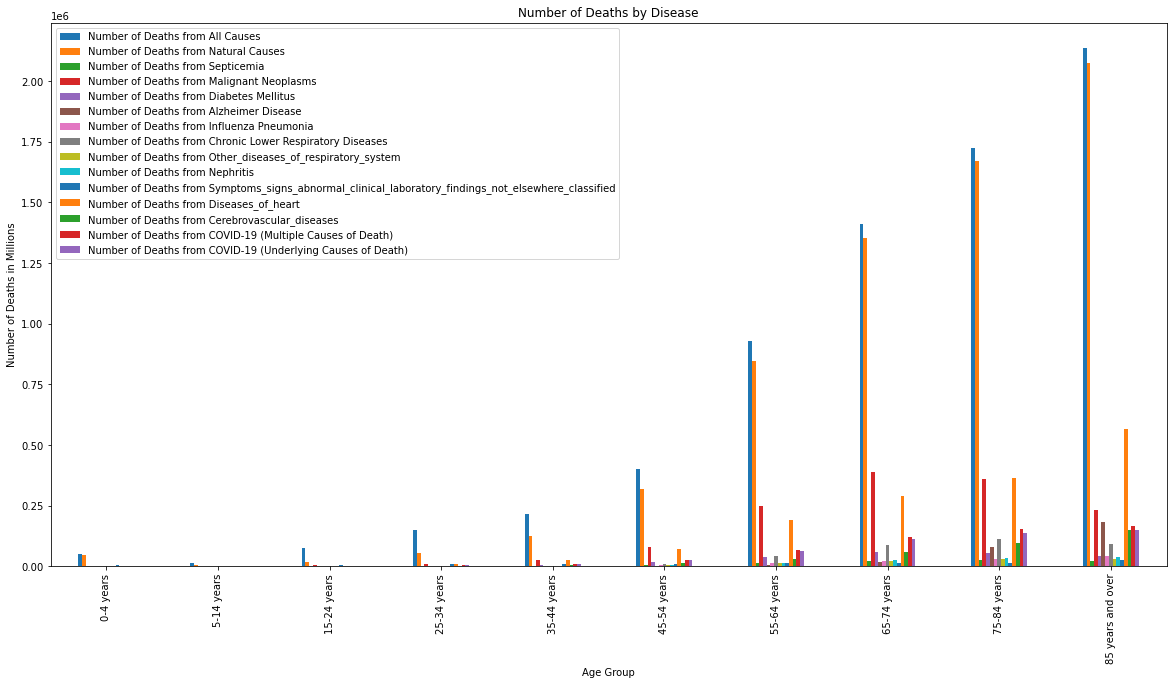

In [27]:
age_death_total_df.plot.bar(title="Age Death", figsize=(20,10))

# plt.bar(x_axis, timepoints["Drug Regimen"], color='blue', align='center', width= .5)
# plt.xticks(tick_locations, list(timepoints.index), rotation ='vertical')

# plt.xlim(-0.5, len(x_axis)-.5)
# plt.ylim(0, max(timepoints["Drug Regimen"])*1.05)

plt.title("Number of Deaths by Disease")
plt.xlabel("Age Group")
plt.ylabel("Number of Deaths in Millions")

label=["Causes of Death"]
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper right")

# plt.show

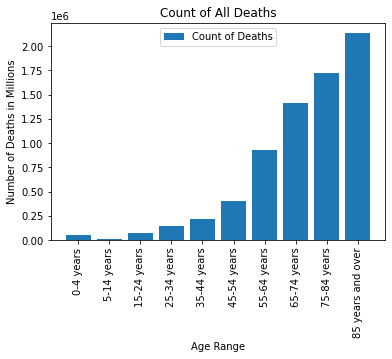

In [26]:
# Generate a bar plot showing the total number of Deaths from all causes
x_axis = age_death_total_df.index

#plt.figure(figsize=(6.25,4.25))


plt.bar(x_axis, age_death_total_df["Number of Deaths from All Causes"])
plt.xticks(rotation ='vertical')

# plt.xlim(-0.5, len(x_axis)-.5)
# plt.ylim(0, max(timepoints["Drug Regimen"])*1.05)

plt.title("Count of All Deaths")
plt.xlabel("Age Range")
plt.ylabel("Number of Deaths in Millions")

label=["Count of Deaths"]
plt.legend(label, loc = "upper center")

# plt.tight_layout()

# plt.show

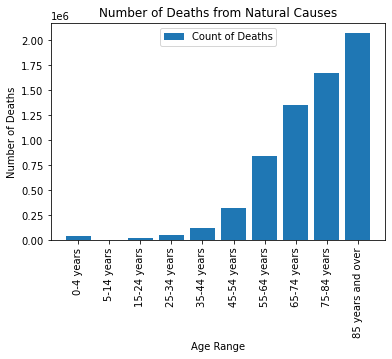

In [25]:
# Generate a bar plot showing the total number of Deaths from all causes
x_axis = age_death_total_df.index

#plt.figure(figsize=(6.25,4.25))


plt.bar(x_axis, age_death_total_df["Number of Deaths from Natural Causes"])
plt.xticks(rotation ='vertical')

# plt.xlim(-0.5, len(x_axis)-.5)
# plt.ylim(0, max(timepoints["Drug Regimen"])*1.05)

plt.title("Number of Deaths from Natural Causes")
plt.xlabel("Age Range")
plt.ylabel("Number of Deaths")

label=["Count of Deaths"]
plt.legend(label, loc = "upper center")

# plt.tight_layout()

# plt.show

In [ ]:
# death_updated1.reset_index(inplace=True)
# death_updated1['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
# death_updated1.sort_values(by='ordering', inplace=True)
# death_updated1.rename(columns={'ordering': 'index'}, inplace=True)
# death_updated1.set_index('index', inplace=True)
# death_updated1

In [ ]:
# death_updated1 = death_updated.groupby(["AgeGroup"])
# #death_updated2 = death_updated1.copy()
# death_updated1.head()

In [ ]:
US_death_total_2019=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [ ]:
US_death_total_2019=US_death_total_2019.loc[US_death_total_2019['Date Of Death Year'] == 2019]

In [ ]:
US_death_total_2019.head()

In [ ]:
US_death_total_2020=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]

In [ ]:
US_death_total_2020=US_death_total_2020.loc[US_death_total_2020['Date Of Death Year'] == 2020]

In [ ]:
US_death_total_2020.head()

In [ ]:
US_death_total_2021=death_updated[death_updated["HHSRegion"].str.contains("United States")==True]
US_death_total_2021=US_death_total_2021.loc[US_death_total_2021['Date Of Death Year'] == 2021]
US_death_total_2021.head()

In [ ]:
death_updated

In [ ]:
#death_updated2=death_updated.groupby(["AgeGroup"])
#death_updated2 = death_updated3.copy()


In [ ]:
# death_updated2.reset_index(inplace=True)
# death_updated2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
# death_updated2.sort_values(by='ordering', inplace=True)
# death_updated2.rename(columns={'ordering': 'index'}, inplace=True)
# death_updated2.set_index('index', inplace=True)
# death_updated2

In [ ]:
HHS1_death_total_df2 = HHS1_death_total_df.copy()
HHS1_death_total_df2.reset_index(inplace=True)
HHS1_death_total_df2['ordering'] = [0, 2, 3, 4, 5, 1, 6, 7, 8, 9]
HHS1_death_total_df2.sort_values(by='ordering', inplace=True)
HHS1_death_total_df2.rename(columns={'ordering': 'index'}, inplace=True)
HHS1_death_total_df2.set_index('index', inplace=True)
HHS1_death_total_df2

In [ ]:
HHS1_death_total=death_updated[death_updated["HHSRegion"].str.contains("1")==True]
HHS1_death_total = HHS1_death_total[HHS1_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS1_death_total=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS1_death_ages_grouped = HHS1_death_total.groupby(["AgeGroup"])
HHS1_death_ages_sum_multiple = HHS1_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS1_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS1_death_ages_sum_m_and_u = HHS1_death_ages_sum_multiple + HHS1_death_ages_sum_underlying


HHS1_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS1_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS1_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS1_death_ages_sum_m_and_u
                              })
HHS1_death_total_ages_final
HHS1_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS1_death_total_df

In [ ]:
HHS2_death_total=death_updated[death_updated["HHSRegion"].str.contains("2")==True]
HHS2_death_total = HHS2_death_total[HHS2_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS2_death_total=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS2_death_ages_grouped = HHS1_death_total.groupby(["AgeGroup"])
HHS2_death_ages_sum_multiple = HHS2_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS2_death_ages_sum_underlying = HHS1_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS2_death_ages_sum_m_and_u = HHS2_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS2_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS2_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS2_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS2_death_ages_sum_m_and_u
                              })
HHS2_death_total_ages_final
HHS2_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS2_death_total_df

In [ ]:
HHS3_death_total=death_updated[death_updated["HHSRegion"].str.contains("3")==True]
HHS3_death_total = HHS3_death_total[HHS3_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS3_death_total=HHS1_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]
#Add "Date Of Death Year", "Date Of Death Month" if you want to divide it up later above

HHS3_death_ages_grouped = HHS3_death_total.groupby(["AgeGroup"])
HHS3_death_ages_sum_multiple = HHS3_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS3_death_ages_sum_underlying = HHS3_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS3_death_ages_sum_m_and_u = HHS3_death_ages_sum_multiple + HHS2_death_ages_sum_underlying


HHS3_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS3_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS3_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS3_death_ages_sum_m_and_u
                              })
HHS3_death_total_ages_final
HHS3_death_total_df=HHS1_death_total_ages_final.sort_values('AgeGroup',ascending=True)
HHS3_death_total_df

In [ ]:
HHS4_death_total=death_updated[death_updated["HHSRegion"].str.contains("4")==True]
HHS4_death_total = HHS4_death_total[HHS4_death_total["Date Of Death Year"].astype('str').str.contains('2020')]
HHS4_death_total=HHS4_death_total[["AgeGroup","COVID-19_Multiple_Cause_of_Death","COVID-19_Underlying_Cause_of_Death"]]

HHS4_death_ages_grouped = HHS4_death_total.groupby(["AgeGroup"])
HHS4_death_ages_sum_multiple = HHS4_death_ages_grouped["COVID-19_Multiple_Cause_of_Death"].sum()

HHS4_death_ages_sum_underlying = HHS4_death_ages_grouped["COVID-19_Underlying_Cause_of_Death"].sum()

HHS4_death_ages_sum_m_and_u = HHS4_death_ages_sum_multiple + HHS4_death_ages_sum_underlying


HHS4_death_total_ages_final = pd.DataFrame({
                                "Number of Deaths from COVID-19 (Multiple Causes of Death)": HHS4_death_ages_sum_multiple, 
                                "Number of Deaths from COVID-19 (Underlying Causes of Death)": HHS4_death_ages_sum_underlying,
                                "Total COVID-19 Deaths": HHS4_death_ages_sum_m_and_u
                              })
HHS4_death_total_ages_final

In [ ]:
#Repeat that process for all 11.... if there's an easier way I'm all ears, I tried a loop but failed

In [ ]:
x_axis = np.arange(len(HHS4_death_total_ages_final))
y_axis=HHS4_death_total_ages_final["Total COVID-19 Deaths"]
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["0-4 years", "5-14 years","15-24 years", "25-34 years", "35-44 years", "45-54 years","55-64 years","65-74 years","75-84 years","85 years and over"], rotation="vertical")
plt.show()

#basic idea.... but i still need to fix the 5-14 and 45-55 years mix up